# Week 4 Handin

## 01 Assignment

## Week 4 Exercise with Numpy

Use only numpy (not pandas) in these exercises
### Exercise 1
1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```
Find out how many people lived in each of the 11 areas in 2015
4. Make a bar plot to show the size of each city area from the smallest to the largest
5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
6. How many of those were from the other nordic countries (not dk)
7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

### Exercise 2  A bit harder (Extra only if you have the time)

1. From "Danmarks Statistik" download demographic data here:
https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Code&delimiter=Semicolon&OMR%C3%85DE=000%2C084%2C147%2C400%2C085%2C083%2C082%2C081%2C851%2C461%2C561%2C751&K%C3%98N=1%2C2&ALDER=0%2C1%2C2%2C3%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11%2C12%2C13%2C14%2C15%2C16%2C17%2C18%2C19%2C20%2C21%2C22%2C23%2C24%2C25%2C26%2C27%2C28%2C29%2C30%2C31%2C32%2C33%2C34%2C35%2C36%2C37%2C3%2C39%2C40%2C41%2C42%2C43%2C44%2C45%2C46%2C47%2C48%2C49%2C50%2C51%2C52%2C53%2C54%2C55%2C56%2C57%2C58%2C59%2C60%2C61%2C62%2C63%2C64%2C65%2C66%2C67%2C68%2C69%2C70%2C71%2C72%2C73%2C74%2C75%2C76%2C77%2C78%2C79%2C80%2C81%2C82%2C83%2C84%2C85%2C86%2C87%2C88%2C89%2C90%2C91%2C92%2C93%2C94%2C95%2C96%2C97%2C98%2C99%2C100&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1


2. clean up the data so it only contains numbers. (If you find this hard to do then Pandas can help (we will cover it next week)
```python
import pandas as pd 
url = 'url from above here'
df = pd.read_csv(url,sep=';')
df['TID'] = df['TID'].map(lambda x:x[:-2]) #cut the last 2 characters
df.to_csv('demografic_cleaned.csv',header=False, index=False)
```
Now you have csv data with columns: OMRÅDE;KØN;ALDER;TID;INDHOLD
3. Now load your demographic data with numpy. (Hint: use np.loadtxt() with dtype and delimiter).
4. Use file: BY_KODER_demographics.csv to get cities from the city codes
5. Now find out which city in 2020 has the highest percentage of men (gender code 1),(Hint: create a function to return summed up data by city code ala: def summed_by_city(city_code): returning pct_male 
6. Create a line chart with 5 lines showing population changes in the 5 largest cities from 2008 to 2020




## 02 Status
Nothing is done.

## 03 Solution part 1

1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`

In [1]:
%matplotlib inline
import numpy as np

ndarr = np.genfromtxt('../../data/befkbhalderstatkode.csv', delimiter=',', dtype=np.uint, skip_header=1)
print(ndarr)

[[2015    1    0 5100  614]
 [2015    1    0 5104    2]
 [2015    1    0 5106    1]
 ...
 [1992   99   89 5100    1]
 [1992   99   90 5180    1]
 [1992   99   93 5100    1]]


3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```
Find out how many people lived in each of the 11 areas in 2015

In [2]:
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}

#AAR,BYDEL,ALDER,STATKODE,PERSONER

def get_people_in_each_neighb():
    result = {}
    for p in neighb:
        mask = (ndarr[:,0] == 2015) & (ndarr[:,1] == p)
        result[neighb[p]] = np.sum(ndarr[mask][:,4])
    return result

get_people_in_each_neighb()

{'Indre By': 51937,
 'Østerbro': 75113,
 'Nørrebro': 78802,
 'Vesterbro/Kgs. Enghave': 61623,
 'Valby': 51727,
 'Vanløse': 39537,
 'Brønshøj-Husum': 43908,
 'Bispebjerg': 53604,
 'Amager Øst': 55205,
 'Amager Vest': 64967,
 'Udenfor': 3872}

4. Make a bar plot to show the size of each city area from the smallest to the largest

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

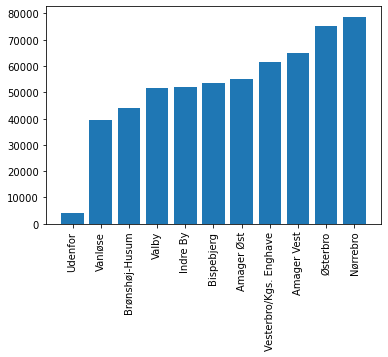

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import operator

summed_neighb = get_people_in_each_neighb()
result_neighb = {k: v for k, v in sorted(summed_neighb.items(), key=lambda item: item[1])}
#result_neighb = sorted(summed_neighb.items(), key=operator.itemgetter(0))
plt.bar(result_neighb.keys(), result_neighb.values())
plt.xticks(rotation='vertical')

5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015

In [4]:
#AAR,BYDEL,ALDER,STATKODE,PERSONER
mask = (ndarr[:,0] == 2015) & (ndarr[:,2] > 65)
print('People above 65 years living in Copenhagen in 2015:', np.sum(ndarr[mask][:,4]))

People above 65 years living in Copenhagen in 2015: 55750


6. How many of those were from the other nordic countries (not dk)

In [5]:
other_nordic_countries = {5104:'Finland', 5105: 'Island, ligeret dansk', 5106: 'Island', 5110: 'Norge', 5120:'Sverige'}
mask = (ndarr[:,0] == 2015) & (ndarr[:,2] > 65) & ((ndarr[:,3] == 5104) | (ndarr[:,3] == 5105) | (ndarr[:,3] == 5106) | (ndarr[:,3] == 5110) | (ndarr[:,3] == 5120))

print('Number of people from other nordic countries above the age of 65:', np.sum(ndarr[mask][:,4]))

Number of people from other nordic countries above the age of 65: 610


7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

<IPython.core.display.Javascript object>


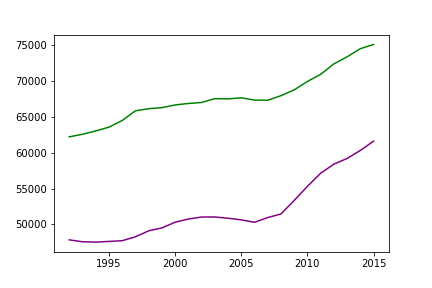

In [17]:
%matplotlib notebook
import matplotlib.pyplot as plt

#Østerbro 2
def get_people_from_oesterbro_from_1992_to_2015():
    result = {}
    for i in range(1992,2016):
        mask = (ndarr[:,0] == i) & (ndarr[:,1] == 2)
        result[i] = np.sum(ndarr[mask][:,4])
    return result
#Vesterbro 4

def get_people_from_vesterbro_from_1992_to_2015():
    result = {}
    for i in range(1992,2016):
        mask = (ndarr[:,0] == i) & (ndarr[:,1] == 4)
        result[i] = np.sum(ndarr[mask][:,4])
    return result

oesterbro_people = get_people_from_oesterbro_from_1992_to_2015()
plt.plot(list(oesterbro_people.keys()), list(oesterbro_people.values()), color='green')
vesterbro_people = get_people_from_vesterbro_from_1992_to_2015()
plt.plot(list(vesterbro_people.keys()), list(vesterbro_people.values()), color='purple')

#plt.show()